### Imports

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import AllCountriesTwitchStudy
    import CountryTwitchStudy
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.


In [2]:
# Configuração de estilo dos gráficos
plt.style.use('dark_background')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Calcular as variáveis

<b> NOTA: O código Abaixo só devo ser corrido caso seja necessário recalcular as novas variáveis! </b>

### Visualizar um exemplo dos dados

In [3]:
pais = countries[4]
df = pd.read_csv(base_dir / 'data' / pais / f'twitch_network_metrics_{pais}.csv', sep = ',', encoding='utf-8')
df

,node,degree,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,community_leiden,views,partner,mature,days,clustering_coef
0,2161,2040,0.311546,0.573732,0.100286,0.214575,1,44374644,True,True,2027,0.014507
1,771,1695,0.258858,0.546578,0.075860,0.164950,2,17166188,True,False,2419,0.016077
2,5968,1666,0.254429,0.544940,0.060976,0.175629,1,42801507,True,False,610,0.014081
3,5511,1500,0.229078,0.529731,0.057995,0.146893,1,44534929,True,False,2613,0.014473
4,5543,1216,0.185706,0.515347,0.037549,0.123553,1,4890741,True,False,1783,0.013790
...,...,...,...,...,...,...,...,...,...,...,...,...
6544,6007,1,0.000153,0.256011,0.000000,0.000019,4,1574,False,False,978,0.000000
6545,5630,1,0.000153,0.256222,0.000000,0.000020,0,13179,False,True,2056,0.000000
6546,2910,1,0.000153,0.301557,0.000000,0.000127,0,601,False,False,416,0.000000
6547,1621,1,0.000153,0.326763,0.000000,0.000514,1,4124,False,True,2100,0.000000


## Comparação entre as diferentes regiões

In [4]:
df = pd.read_csv(base_dir / 'data' / 'Resultados' / 'network_metrics_summary.csv', sep = ',', encoding='utf-8')
df

,Country,Number of Nodes,Number of Edges,Number of Components,Diameter,Density,Average Clustering Coefficient,Average Path Length,Assortativity,Number of Mature Nodes,Number of Non-Mature Nodes,Number of Partner Nodes,Number of Non-Partner Nodes
0,PTBR,1912,31299,1,7,0.017132,0.319895,2.532379,-0.232462,661,1251,279,1633
1,DE,9498,153138,1,7,0.003395,0.200886,2.721571,-0.115173,5742,3756,597,8901
2,ENGB,7126,35324,1,10,0.001391,0.130928,3.677616,-0.121908,3888,3238,384,6742
3,ES,4648,59382,1,9,0.005499,0.222496,2.883191,-0.189051,1360,3288,395,4253
4,FR,6549,112666,1,7,0.005255,0.221706,2.680991,-0.178151,2414,4135,408,6141
5,RU,4385,37304,1,9,0.003881,0.165797,3.021095,-0.182289,1075,3310,474,3911


### Nodes

#### **Mature**

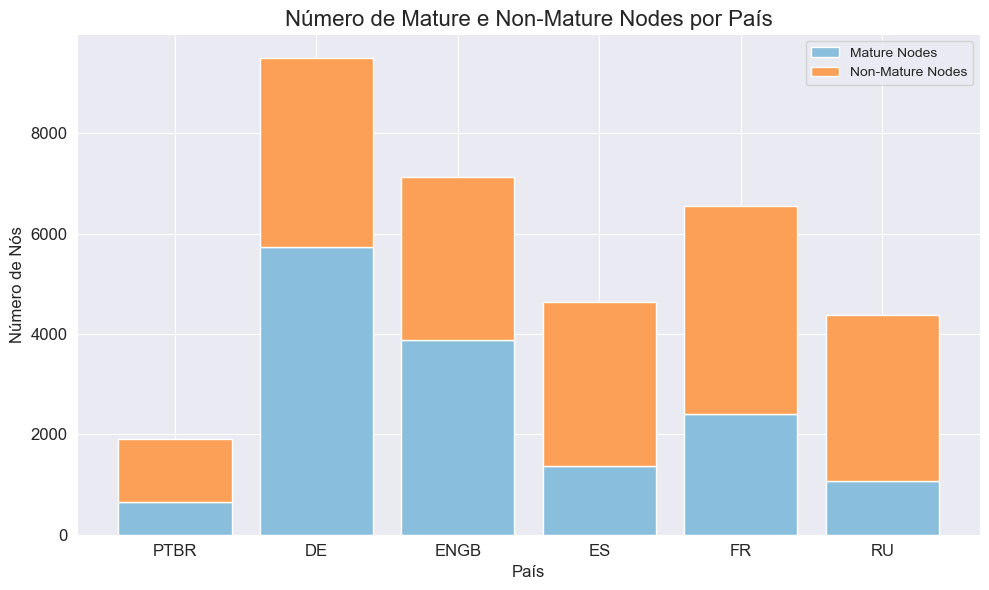

In [5]:
# Plotar as barras para "Mature Nodes" e "Non-Mature Nodes"
plt.bar(df['Country'], df['Number of Mature Nodes'], label='Mature Nodes', color=sns.color_palette("Blues")[2])
plt.bar(df['Country'], df['Number of Non-Mature Nodes'], bottom=df['Number of Mature Nodes'], label='Non-Mature Nodes', color=sns.color_palette("Oranges")[2])

# Adicionar título e rótulos
plt.title('Número de Mature e Non-Mature Nodes por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Nós', fontsize=12)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

No gráfico acima, é possível observar a quantidade total de nós em cada uma das regiões, sendo destacada a proporção de nós com conteúdo _mature_ e _non-mature_. 

- **Definição de Conta _Mature_:** Na Twitch, uma conta é classificada como **_mature** quando o seu conteúdo é direcionado a um público adulto, geralmente por conter linguagem explícita, temas sensíveis ou outro tipo de material não recomendado para todas as idades.

- **Amostra por País:** Nota-se que a região **DE** apresenta a maior amostra de dados, enquanto **PTBR** possui a menor.

- **Distribuição de Conteúdo _Mature_:** Apenas as regiões **DE** e **ENGB** possuem uma maioria relativa de nós classificados como _mature_. Nas demais regiões, o número de nós _non-mature_ é predominante.

Esta análise permite identificar não apenas a representatividade de cada país, mas também as diferenças na classificação de conteúdo, proporcionando insights importantes sobre as características das comunidades em cada região.


#### **Partner**

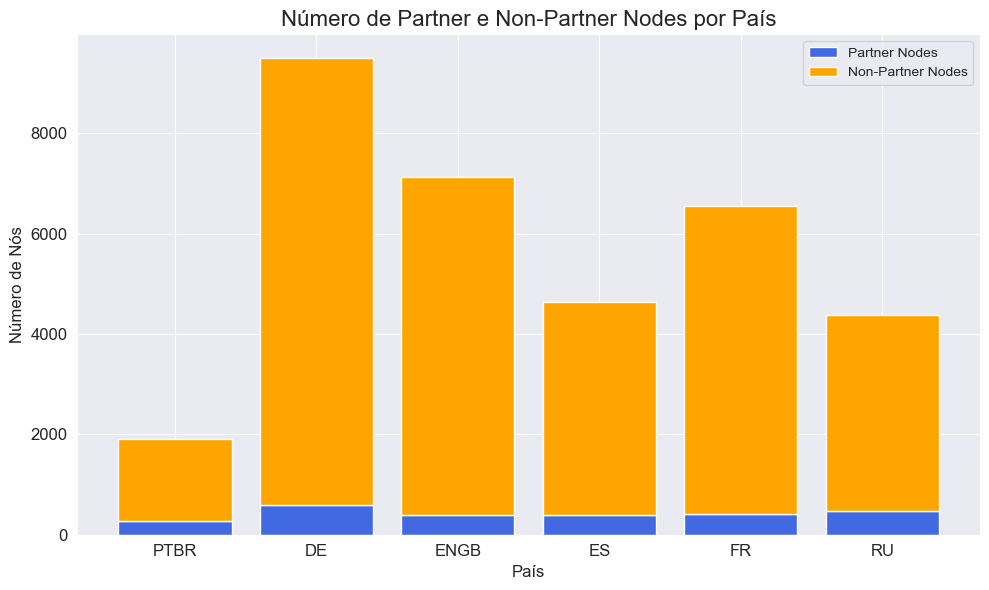

In [6]:
# Plotar as barras para "Mature Nodes" e "Non-Mature Nodes"
plt.bar(df['Country'], df['Number of Partner Nodes'], label='Partner Nodes', color='royalblue')
plt.bar(df['Country'], df['Number of Non-Partner Nodes'], bottom=df['Number of Partner Nodes'], label='Non-Partner Nodes', color='orange')

# Adicionar título e rótulos
plt.title('Número de Partner e Non-Partner Nodes por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Nós', fontsize=12)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

No gráfico acima, é possível observar a quantidade total de nós em cada uma das regiões, sendo destacada a proporção de nós classificados como _partner_ e _non-partner_. 

- **Definição de Conta _Partner_:** Na Twitch, uma conta é classificada como **_partner_** quando o streamer atinge um alto nível de desempenho, incluindo métricas como número de visualizações, consistência de streaming e engajamento da audiência. Os _partners_ recebem benefícios exclusivos, como monetização avançada e suporte personalizado.

- **Distribuição de Parceiros:** De forma geral, observa-se que a quantidade de contas _non-partner_ é significativamente maior do que a de _partners_ em todas as regiões analisadas.

Esta análise evidencia não apenas a representatividade de cada país, mas também a disparidade no alcance do status de _partner_, refletindo as diferenças no nível de profissionalização das comunidades de streamers em cada região.


### Assortativity

Na teoria dos grafos, **assortatividade** (ou coeficiente de assortatividade) mede o grau de correlação entre as características dos vértices que estão conectados por uma aresta. Esta métrica é frequentemente usada para entender padrões de ligação em redes complexas e sociais.

**Definição Matemática**
Assortatividade é definida como o coeficiente de correlação de Pearson entre as características dos nós em cada extremidade de uma aresta. Pode ser representada matematicamente como:

$$
r = \frac{\sum_{i}(j_i - \bar{j})(k_i - \bar{k})}{\sqrt{\sum_{i}(j_i - \bar{j})^2 \sum_{i}(k_i - \bar{k})^2}}
$$

Onde:
- $ j_i \ e \ k_i $ são os valores das características dos dois nós conectados por uma aresta.
- $ \bar{j} \ e \ \bar{k} $ são as médias das características.

In [7]:
df["Assortativity"].unique()

array([-0.2324621 , -0.11517321, -0.12190796, -0.18905071, -0.17815057,
       -0.18228886])

**Valores do Coeficiente**
- **\( r > 0 \)**: Indica uma rede assortativa, ou seja, existe uma tendência de nós semelhantes (em grau ou característica) estarem conectados.
- **\( r < 0 \)**: Indica uma rede dissortativa, onde nós diferentes estão mais propensos a se conectar.
- **\( r = 0 \)**: Indica que não há correlação aparente entre os nós conectados.

**Conclusão**

As assortatividades dos grafos analisados para diferentes regiões da Twitch são todas **negativas e próximas de 0**, indicando que as redes apresentam uma leve tendência dissortativa. Isto sugere que os nós com alto grau de conexões, como streamers com muitas amizades na plataforma, tendem a conectar-se com nós de baixo grau, como contas com menos conexões. 

No contexto da Twitch, este comportamento pode ser explicado pelo fato de que contas com menor grau frequentemente se conectam não apenas ao streamer principal (o hub da rede), mas também entre si, formando subgrupos locais de interação dentro da comunidade do streamer. Esta estrutura cria uma rede relativamente equilibrada e interligada, com um papel central desempenhado pelos hubs, mas sem uma polarização extrema nas conexões.

---

### Diameter & Average Path Length

- **Diameter**: O diâmetro de um grafo é a maior distância mínima (geodésica) entre dois nós no grafo. Representa o caminho mais longo, em termos de número de arestas, que conecta dois nós na rede.
- **Average Path Length**: O comprimento médio dos caminhos é a média das distâncias mínimas (geodésicas) entre todos os pares de nós no grafo. Reflete a eficiência da conectividade da rede.

**Análise dos Valores**

| **Country** | **Diameter** | **Average Path Length** |
|-------------|--------------|--------------------------|
| PTBR        | 7            | 2.532                   |
| DE          | 7            | 2.722                   |
| ENGB        | 10           | 3.678                   |
| ES          | 9            | 2.883                   |
| FR          | 7            | 2.681                   |
| RU          | 9            | 3.021                   |

**Observações**
1. **Diâmetro:**
   - O diâmetro mais elevado foi registado na região **ENGB**, com um valor de **10**, indicando que as redes dessa região têm uma maior dispersão em termos de conectividade.
   - As regiões **PTBR**, **DE** e **FR** apresentam um diâmetro mais reduzido (**7**), o que sugere uma rede mais compacta.

2. **Comprimento Médio dos Caminhos:**
   - **PTBR** possui o menor comprimento médio dos caminhos (**2.532**), sugerindo uma rede eficiente com conexões curtas entre os nós.
   - **ENGB** apresenta o maior comprimento médio (**3.678**), indicando uma rede com caminhos relativamente mais longos entre os nós.

**Conclusão**

As diferenças observadas no **diâmetro** e no **comprimento médio dos caminhos** refletem variações na estrutura das redes da Twitch entre as diferentes regiões. Regiões como **PTBR** possuem redes mais compactas e conectadas, enquanto **ENGB** evidencia uma rede mais dispersa, com maior distância média entre os nós. Esta disparidade pode estar associada à densidade e organização das comunidades dentro de cada região.

---

### Average Clustering Coefficient

**Definição:**
- O **Average Clustering Coefficient** mede o grau médio de agrupamento dos nós em uma rede. Indica a probabilidade de que os vizinhos de um nó estejam conectados entre si, refletindo a presença de estruturas locais densamente conectadas.

**Valores Observados**

| **Country** | **Average Clustering Coefficient** |
|-------------|------------------------------------|
| PTBR        | 0.320                              |
| DE          | 0.201                              |
| ENGB        | 0.131                              |
| ES          | 0.222                              |
| FR          | 0.222                              |
| RU          | 0.166                              |

**Observações**
1. **PTBR** apresenta o maior coeficiente médio de agrupamento (**0.320**), indicando uma rede com maior densidade local e uma forte tendência de formação de comunidades.
2. **ENGB** tem o menor coeficiente médio (**0.131**), sugerindo uma estrutura menos agrupada, com menor interconexão entre os vizinhos.
3. Regiões como **ES** e **FR** apresentam coeficientes similares (**0.222**), sugerindo características estruturais locais semelhantes.

**Conclusão:**
- Os valores do **Average Clustering Coefficient** mostram variações significativas no grau de agrupamento entre as regiões da Twitch. Redes como a de **PTBR** evidenciam uma maior densidade local, possivelmente refletindo comunidades mais coesas, enquanto regiões como **ENGB** apresentam uma estrutura mais dispersa e menos conectada localmente.
